K32-XLAVNC-Lab01</br>
Học viên: Đoàn Minh Hòa</br>
MSSV: 22C15028

# 1. Đọc vào một ảnh và hiển thị

In [31]:
#Khai báo các thư viện cần thiết
import numpy as np
import cv2
import matplotlib.pyplot as plt

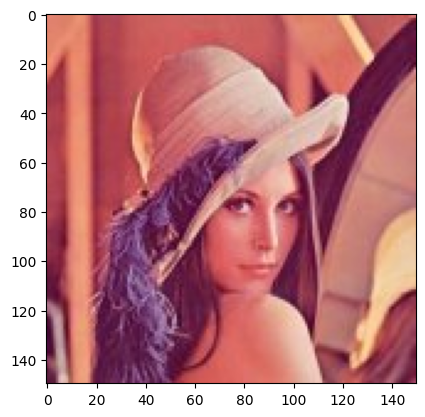

In [32]:
#Đọc ảnh và hiển thị
#Hàm cv2.imread(filename[,flags]): Hàm tải ảnh lên
#Hàm cv2.cvtColor sẽ giải mã ảnh theo thứ tự Blue Green Red, và chuyển từ BGR sang RGB lại bằng COLOR_BGR2RGB
img = cv2.imread("Lenna.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
#Thông tin của bức ảnh w x h x c
img.shape

(150, 150, 3)

# 2. Rút trích đặc trưng

**2.1. Rút trích đặc trưng màu**

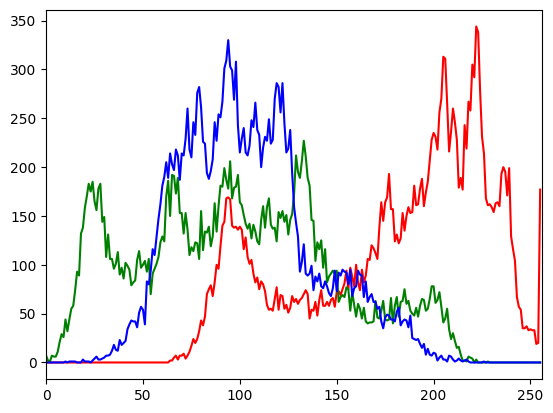

In [8]:
#Vẽ đồ thị histogram cho mỗi kênh màu của ảnh
#Sử dụng vòng lặp for để lặp qua từng kênh màu trong ảnh. Trong đó 'i' là chỉ số của kênh màu (0,1 hoặc 2) còn col tương ứng với ('r','g' hoặc 'b')
#Sử dụng hàm cv2.calcHist(images, channels, mask, histSize, ranges) để tính toán histogram cho hình ảnh. 
#- Trong đó, images là ảnh đầu vào, channels là kênh màu tính toán histogram, mask là mặt nạ giúp histogram tính toán một phần cụ thể của ảnh nếu tính his cho toàn bộ thì sẽ truyền None
#- Trong đó, histSie là số lượng "bins" muốn sử dụng cho histogram, ở đây là giá trị cố định cho trục x mà dữ liệu phân loại vào.
#- Trong đó, ranges là phạm vi giá trị các pixel muốn tính histogram.
#Hàm plt.plot dùng để vẽ histogram, truyền vào kiểu hiển thị và thiết lập màu sắc đường vẽ.
#Hàm plt.xlim để giới hạn cho trục tọa độ x của biểu đồ.
color = ('r','g','b')
for i,col in enumerate(color):
  histogram = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histogram, color=col)
  plt.xlim([0,256])
plt.show()
#Giải thích kết quả:
#- Trục x: Đại diện cho dải màu từ 0-255.
#- Trục y: Đại diện cho số lượng pixel trong ảnh có cường độ màu tương ứng.
#- Các đường tương ứng với 'r' đỏ, 'g' xanh lá và 'b' xanh dương.

**2.2. Rút trích đặc trưng biên cạnh**

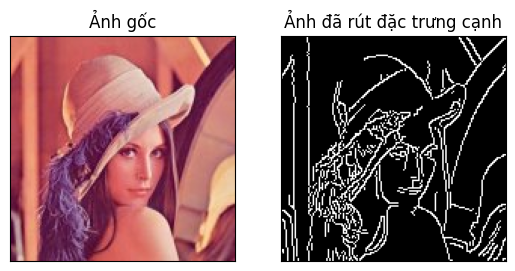

In [13]:
#Sử dụng hàm cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient) để phát hiện cạnh
#-Trong đó, image là ảnh đầu vào, T_lower và T_upper là ngưỡng dưới và ngưỡng trên áp dụng ngưỡng Hysteresis trong thuật toán Canny. Bất kỳ cạnh nào có độ lớn ngoài ngưỡng này sẽ bị loại bỏ.
#-Ở đây, sử dụng plt.subplot để tạo 2 subplot là ảnh gốc và ảnh đã rút biên, plt.xticks và plt.yticks thiết lập để không hiển thị giá trị trục.
#-Tham số aperture_size đây là kích thước của bộ lọc Sobel, mặc định là 3.
#-Tham số L2Gradient là tham số boolean, nếu True sẽ tính độ lớn theo gradient chuẩn L2, nếu là False sẽ tính theo chuẩn L1. Chuẩn L2 sẽ tạo độ lớn gradient mạnh hơn và chính xác hơn so với L1
edges = cv2.Canny(img, 100,200)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title("Ảnh đã rút đặc trưng cạnh"), plt.xticks([]), plt.yticks([])
plt.show()
#Giải thích kết quả:
#-Kết quả gồm 02 ảnh là ảnh gốc và ảnh rút đặc trưng biên cạnh

**2.3. Ví dụ về Edge Detection với toán tử sobel**

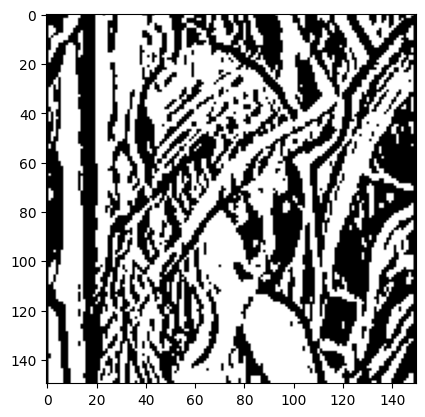

In [38]:
#Edge detection với toán tử sobel
#dst = cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1.0)
img = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ddepth = cv2.CV_64F  # 64-bit float output
dx = 1  # đạo hàm bậc 1 theo x
dy = 0  # không đạo hàm theo y
sobelx = cv2.Sobel(img, ddepth, dx, dy)

plt.imshow(sobelx, cmap='gray');

**2.4. SIFT Detection**

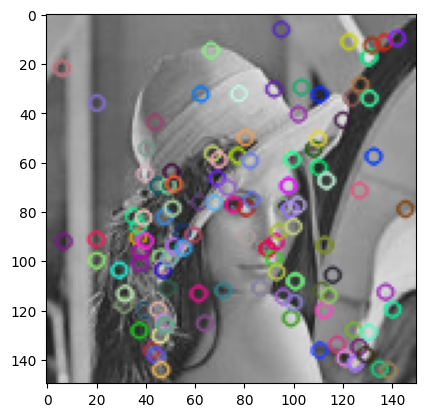

In [39]:
#Sift Detection sử dụng hàm cv2.xfeatures2d.SIFT_create() để tạo ra đối tượng Sift, đối tượng này được dùng để phát hiện các đặc trưng trong ảnh
#Hàm sift.detectAndCompute dùng để phát hiện các đặc trưng trong hình ảnh và tính toán mô tả đặc trưng cho từng điểm, nó trả về một danh sách các điểm đặc trưng (keypoint) và mảng mô tả các đặc trưng (descriptors)
#Hàm cv2.drawKeypoints() dùng để vẽ các điểm đặc trưng
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)
img_sift = cv2.drawKeypoints(img, keypoints, None)
plt.imshow(img_sift)

 **2.5. Oriented FAST and Rotated BRIEF**

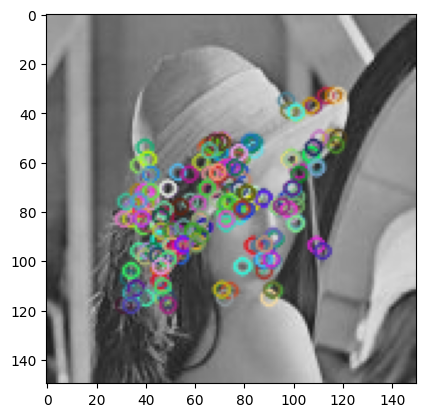

In [42]:
#ORB là một thuật toán tốt và hiệu quả được phát triển bởi OpenCV. Nó kết hợp hai thuật toán FAST (phát hiện góc) và BRIEF (tính toán mô tả đặc trưng)
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(img, None)
img_sift = cv2.drawKeypoints(img, keypoints, None)
plt.imshow(img_sift)

# 3. Các phép biến đổi màu

**3.1. Phép biến đổi màu tuyến tính: Điều chỉnh độ sáng (Brightness), tương phản (Contrast), kết hợp (Brightness + Contrast)**

In [33]:
#Định nghĩa hàm change_brightness_contrast(img, alpha, beta) để biến đổi tuyến tính trên hình ảnh với alpha là độ tương phản (contrast) và beta là độ sáng (brightness)
#Kết quả được chuyển về dạng int để đảm bảo thích hợp với các giá trị pixel hợp lệ
#Điều kiện img_new > 255 và <0 để đảm bảo không có giá trị nào vượt giới hạn tối đa cho phép
def change_brightness_contrast(img, alpha, beta):
  img_new = np.asarray(alpha * img + beta, dtype=int)
  img_new[img_new>255] = 255
  img_new[img_new<0] = 0
  return img_new

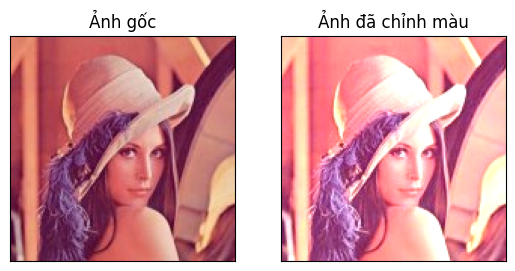

In [34]:
#Giải thích kết quả:
#- Gọi hàm trên và truyền vào ảnh, giá trị alpha và beta, ở đây là 1.4 và 20.
#- Sau đó sử dụng subplot để vẽ 02 ảnh gồm ảnh gốc và ảnh đã chỉnh màu để so sánh.
img1 = cv2.imread("Lenna.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_bright_cont = change_brightness_contrast(img1, 1.4, 20)

plt.subplot(121), plt.imshow(img1, cmap='gray')
plt.title("Ảnh gốc"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_bright_cont, cmap='gray')
plt.title("Ảnh đã chỉnh màu"), plt.xticks([]), plt.yticks([])
plt.show()

**3.2. Phép biến đổi màu phi tuyến: Điều chỉnh ảnh theo phép biến đổi phi tuyến logarithm và hàm e mũ**

In [76]:
#Định nghĩa hàm logarithm biến đổi phi tuyến, tham số đầu vào là ảnh và giá trị c
#Phép biến đổi logarithm ánh xạ một phạm vi rộng (như độ sáng hình ảnh) thành một phạm vi giá trị hẹp. Điều này giúp cho nổi bật các chi tiết quan trọng
#Hệ số c được chọn để chuyển đổi hình ảnh về phạm vi [0,255]
#Làm tròn từng giá trị và chuyển về kiểu int
def change_logarithm(img):
  c = 255/ np.log(1 + np.max(img))
  img_new = np.asarray(c * np.log1p(img), dtype=np.uint8)
  return img_new

In [77]:
#Định nghĩa hàm e mũ biến đổi phi tuyến, tham số đầu vào là ảnh
#Phép biến đổi hàm e mũ hoạt động ngược lại so với phép biến đổi logarit, nó ánh xạ một phạm vi giá trị hẹp sang phạm vi giá trị rộng
def change_mu(img):
  c = 255/ (np.max(img) - np.min(img))
  img_new = np.asarray(c * np.exp(img) , dtype=np.uint8)
  return img_new

<ipython-input-77-b7b088ab5c2f>:5: RuntimeWarning: overflow encountered in exp
  img_new = np.asarray(c * np.exp(img) , dtype=np.uint8)


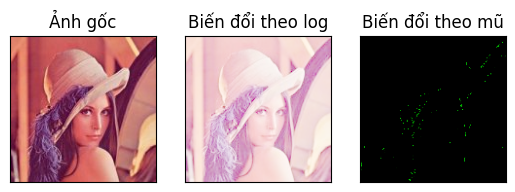

In [79]:
img_logarithm = change_logarithm(img1)
img_mu = change_mu(img1)

plt.subplot(131), plt.imshow(img1, cmap='gray')
plt.title("Ảnh gốc"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_logarithm, cmap='gray')
plt.title("Biến đổi theo log"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_mu, cmap='gray')
plt.title("Biến đổi theo mũ"), plt.xticks([]), plt.yticks([])
plt.show()

**3.3. Phép biến đổi màu: Dựa trên phân bố xác suất - Cân bằng lược đồ xám (Histogram Equalization)**

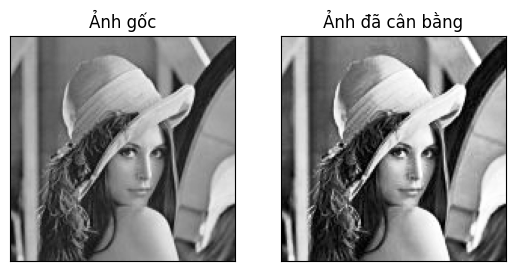

In [88]:
#Histogram Equalization là sự điều chỉnh của ảnh về mức cân bằng
#Tương tự các bước trên đọc ảnh dưới dạng Grayscale
#Sử dụng hàm cv2.equalizeHist để cân bằng lược đồ xám, tham số truyền vào là ảnh
img2 = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)
equalized_img = cv2.equalizeHist(img2)

hist_img2 = cv2.calcHist([img2], [0], None, [256], [0,256])
hist_equalized = cv2.calcHist([equalized_img], [0], None, [256], [0,256])

plt.subplot(121), plt.imshow(img2, cmap='gray')
plt.title("Ảnh gốc"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(equalized_img, cmap='gray')
plt.title("Ảnh đã cân bằng"), plt.xticks([]), plt.yticks([])
plt.show()

# 4. Các phép làm trơn ảnh

**4.1. Toán tử trung bình**

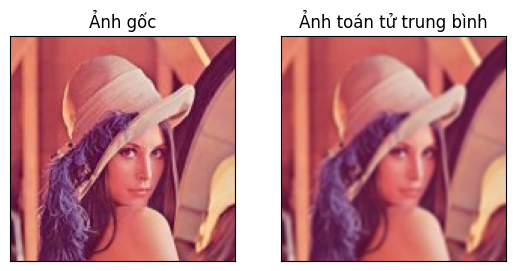

In [102]:
#Sử dụng hàm cv2.blur(image, kernel) để làm trơn mờ ảnh bằng cách truyền vào 1 kernel ví dụ kernel = (3,3) thì ảnh sẽ được áp lên mặt na với giá trị k = 1/9 [[1 1 1][1 1 1][1 1 1]]
img4 = cv2.imread("Lenna.jpg")
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

kernel = (3,3)
average = cv2.blur(img4,kernel)

plt.subplot(121), plt.imshow(img4), plt.title("Ảnh gốc")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(average), plt.title("Ảnh toán tử trung bình")
plt.xticks([]), plt.yticks([]);

**4.2. Toán tử Gaussian**

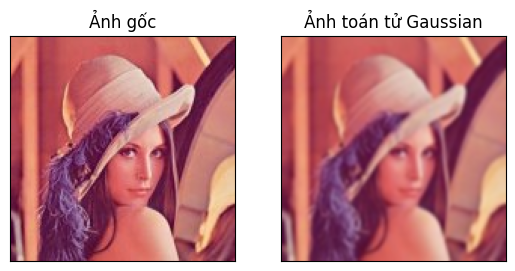

In [103]:
img_gaussian = cv2.GaussianBlur(img4, (5,5), 0)

plt.subplot(121), plt.imshow(img4), plt.title("Ảnh gốc")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_gaussian), plt.title("Ảnh toán tử Gaussian")
plt.xticks([]), plt.yticks([]);

**4.3. Toán tử trung vị**

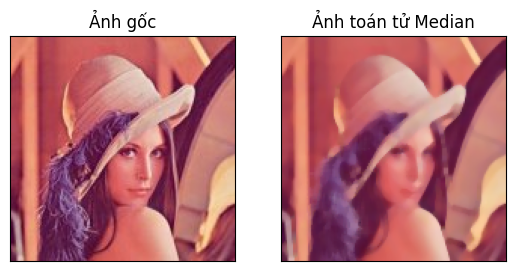

In [104]:
median = cv2.medianBlur(img4,5)
plt.subplot(121), plt.imshow(img4), plt.title("Ảnh gốc")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median), plt.title("Ảnh toán tử Median")
plt.xticks([]), plt.yticks([]);

**4.4. Toán tử Bilateral**

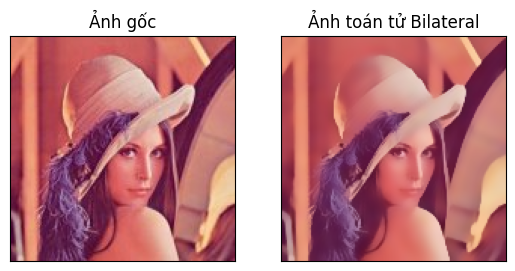

In [105]:
bilateral = cv2.bilateralFilter(img4,9,75,75)

plt.subplot(121), plt.imshow(img4), plt.title("Ảnh gốc")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(bilateral), plt.title("Ảnh toán tử Bilateral")
plt.xticks([]), plt.yticks([]);

**4.5. Unsharp masking**

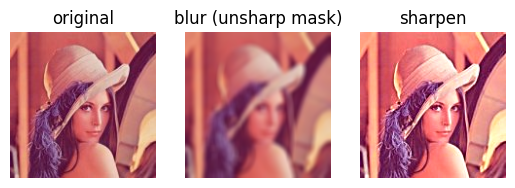

In [109]:
#Filter có tác dụng làm sắc nét các cạnh, cạnh có thể hiểu là nơi chuyển giao từ mức sáng này sang mức sáng khác
#Trước tiên chúng ta dùng hàm cv2.GaussianBlur để làm mờ ảnh gốc (Original signal), ảnh này gọi là Blured signal
#Sau đó sẽ lấy Original - Blured ta sẽ có Unsharp mask và cuối cùng lấy Original + Unsharped* hệ số k, ta sẽ có kết quả Sharpened Signal
img5 = cv2.imread("Lenna.jpg")
img5 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
blur_img = cv2.GaussianBlur(img5, (7,7), 3.0)
fimage = cv2.addWeighted(img5, 1.7, blur_img, -0.5, 0)
# fimage = image * 1.7 - 0.5 * blur + 0
plt.subplot(1, 3, 1); plt.imshow(img5[:,:,::-1]); plt.axis("off"); plt.title("original")
plt.subplot(1, 3, 2); plt.imshow(blur_img[:,:,::-1]); plt.axis("off"); plt.title("blur (unsharp mask)")
plt.subplot(1, 3, 3); plt.imshow(fimage[:,:,::-1]); plt.axis("off"); plt.title("sharpen");

**4.5. Constrained average filter**

In [27]:
#Định nghĩa hàm constrained_mean() để tính toán các giá trị nằm trong khoảng min, max
#Các giá trị nào không thỏa ràng buộc, trả về giá trị trung bình
from scipy.ndimage import generic_filter

def constrained_mean(values):
    # Các giá trị min, max
    min_val = 100  
    max_val = 150 

    # Các giá trị nằm trong phạm vi min, max
    constrained_values = [v for v in values if min_val <= v <= max_val]
    
    # Nếu không có giá trị nào thỏa mãn ràng buộc, trả về giá trị trung bình của tất cả các giá trị
    if not constrained_values:
        return np.mean(values)
    
    # Trả về trung bình của các giá trị thỏa mãn ràng buộc
    return np.mean(constrained_values)

In [28]:
#Sử dụng hàm generic_filter của thư viện scipy, đây là hàm cho phép áp dụng bất kỳ bộ lọc nào muốn cho một hình ảnh hoặc mảng nhiều chiều
def constrained_average_filter(img, filter_size):
    # Sử dụng scipy's generic_filter để áp dụng toán tử trung bình có ràng buộc
    result = generic_filter(img, constrained_mean, size=filter_size)
    return result

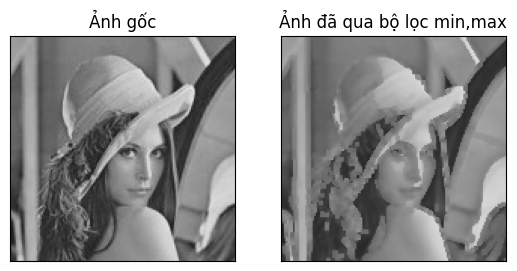

In [30]:
#Giải thích kết quả:
#- Gồm ảnh gray đã qua bộ lộc trung bình kèm điều kiện min, max
img6 = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

filtered_img = constrained_average_filter(img6, filter_size=3)

plt.subplot(121), plt.imshow(img6), plt.title("Ảnh gốc")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_img), plt.title("Ảnh đã qua bộ lọc min,max")
plt.xticks([]), plt.yticks([]);

# **References**:</br>
[1] Image Filtering, https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html </br>
[2] Histogram Equalization, https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html </br>
[3] Canny Edge Detection, https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html </br>
[4] Smoothing Image, https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html </br>
[5] Introduction to SIFT, https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html 
